<a href="https://colab.research.google.com/github/Satwik67/Satwik67/blob/main/Function_Approximator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
m =100

                                                          FUNCTION TO APPROXIMATE
$$ (x_1 , x_2)\mapsto y = \left\{ \begin{array}{rcl}
{1} & \mbox{if}
& x_1x_2<0 \\ 0 & \mbox{else}
\end{array}\right.$$



$$Iteration$$

Using Activation Function Logistic sigmoid
$$lgsm(x) = \frac{1}{1+e^{-x}} $$

Forward propagation
$${Z^{[1]}} = {W^{[1]}X} + {b^{[1]}}$$
$${A^{[1]}} = lgsm({Z^{[1]}})$$
$${Z^{[2]}} = {W^{[2]}{A^{[1]}}} + {b^{[2]}}$$
$${A^{[2]}} = lgsm({Z^{[2]}})$$
$${Z^{[3]}} = {W^{[3]}{A^{[2]}}} + {b^{[3]}}$$
$${A^{[3]}} = lgsm({Z^{[3]}})$$

Derivative of logistic sigmoid for backward propagation
$$lgsm'(x) = lgsm(x)(1 - lgsm(x))$$

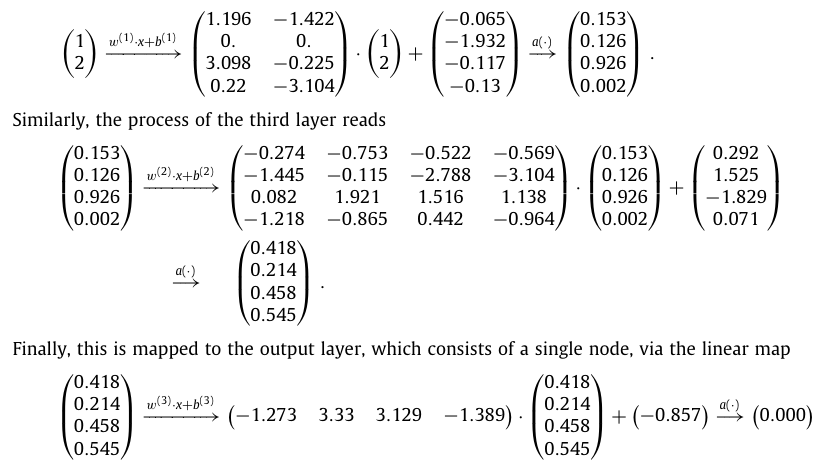

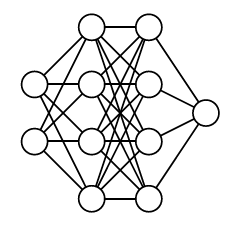

Backward Propagation
$${dZ^{[3]}} = {A^{[3]}} - {Y}$$
$${dW^{[3]}} = \frac{1}{m}{dZ^{[3]}}{A^{[2]T}}$$
$${db^{[3]}} = \frac{1}{m}\Sigma{dZ^{[3]}}$$

$${dZ^{[2]}} = {W^{[3]T}}{dZ^{[3]}}lgsm'({Z^{[2]}})$$
$${dW^{[2]}} = \frac{1}{m}{dZ^{[2]}}{A^{[1]T}}$$
$${db^{[2]}} = \frac{1}{m}\Sigma{dZ^{[2]}}$$

$${dZ^{[1]}} = {W^{[2]T}}{dZ^{[2]}}lgsm'({Z^{[1]}})$$
$${dW^{[1]}} = \frac{1}{m}{dZ^{[1]}}{X^{T}}$$
$${db^{[1]}} = \frac{1}{m}\Sigma{dZ^{[1]}}$$


Updating Parameters
$${W^{[3]}} \Rightarrow {W^{[3]}} - \alpha{dW^{[3]}}$$
$${b^{[3]}} \Rightarrow {b^{[3]}} - \alpha{db^{[3]}}$$
$${W^{[2]}} \Rightarrow {W^{[2]}} - \alpha{dW^{[2]}}$$
$${b^{[2]}} \Rightarrow {b^{[2]}} - \alpha{db^{[2]}}$$
$${W^{[1]}} \Rightarrow {W^{[1]}} - \alpha{dW^{[1]}}$$
$${b^{[1]}} \Rightarrow {b^{[1]}} - \alpha{db^{[1]}}$$

In [ ]:
def initial_params():
  w1 = np.random.rand(4,2) - 0.5               # initializing parameters of neural network which will be updated by multiple iterations using backward propagation
  b1 = np.random.rand(4,1) - 0.5               # and gradient descent
  w2 = np.random.rand(4,4) - 0.5
  b2 = np.random.rand(4,1) - 0.5
  w3 = np.random.rand(1,4) - 0.5
  b3 = np.random.rand(1,1) - 0.5
  return w1,b1,w2,b2,w3,b3

def lgsm(z):
  a = 1 / (1 + np.exp(-z))                     #activation function to go to next layer in neural network
  return a

def deri_lgsm(z):                              # this function will be used in backward propagation to go to previous layer
  return lgsm(z) * (1 - lgsm(z))

def fp(w1,b1,w2,b2,w3,b3,x):                  # this function takes input and returns output at last layer of neural network or prediction
  z1 = w1.dot(x) + b1
  a1 = lgsm(z1)
  z2 = w2.dot(a1) + b2
  a2 = lgsm(z2)
  z3 = w3.dot(a2) + b3
  a3 = lgsm(z3)
  return z1,a1,z2,a2,z3,a3

def bp(a1,a2,a3,z1,z2,z3,w1,w2,w3,x,y):       # this function is used for backward propagation
  dz3 = a3 - y
  dw3 = 1 / m * dz3.dot(a2.T)
  db3 = 1 / m * np.sum(dz3)
  dz2 = w3.T.dot(dz3) * deri_lgsm(z2)
  dw2 = 1 / m * dz2.dot(a1.T)
  db2 = 1 / m * np.sum(dz2)
  dz1 = w2.T.dot(dz2) * deri_lgsm(z1)
  dw1 = 1 / m * dz1.dot(x.T)
  db1 = 1 / m * np.sum(dz1)
  return dw1,db1,dw2,db2,dw3,db3

def update_param(w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,hp):      # this is gradient descent where parameters are upated for next iteration and for more accurate prediction
  w1 -= hp * dw1
  b1 -= hp * db1
  w2 -= hp * dw2
  b2 -= hp * db2
  w3 -= hp * dw3
  b3 -= hp * db3
  return w1,b1,w2,b2,w3,b3


In [ ]:
def get_error(a3,y):                              # for plotting
  return np.mean(np.absolute(a3 - y)) / 100

def accuracy(a3,y):                              # tells how many predictions are correct
  a3_predicted = np.round(a3)
  return np.sum(a3_predicted == y) / 100

In [ ]:
def train(x,y,hp,iter):                              # this function tells the steps that will happen in each iteration
  error = []
  iteration = [i for i in range(0,iter,2)]
  w1,b1,w2,b2,w3,b3 = initial_params()
  for i in range(iter):
    z1,a1,z2,a2,z3,a3 = fp(w1,b1,w2,b2,w3,b3,x)
    dw1,db1,dw2,db2,dw3,db3 = bp(a1,a2,a3,z1,z2,z3,w1,w2,w3,x,y)
    w1,b1,w2,b2,w3,b3 = update_param(w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,hp)
    if i % 2 == 0:
      print('iteration :',i)
      error.append(get_error(a3,y))
      print('accuracy :',accuracy(a3,y))
  plt.plot(iteration,error)
  return w1,b1,w2,b2,w3,b3

In [ ]:
data = np.zeros((100,3))                                 # generating input data for function
print(data)

for i in range(len(data)):
  data[i][1] = rd.uniform(-10, 10)
  data[i][2] = rd.uniform(-10, 10)
  if (data[i][1] * data[i][2]) < 0:                       # true output values
    data[i][0] = 1
  else:
    data[i][0] = 0
print(data)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0.

In [ ]:
m, n = data.shape                      # shuffling data
print(m,n)
np.random.shuffle(data)
print(data)

100 3
[[ 0.00000000e+00  6.99801050e+00  6.08213117e+00]
 [ 1.00000000e+00  3.24861547e+00 -1.03578497e+00]
 [ 1.00000000e+00 -5.88509389e+00  9.31116794e+00]
 [ 0.00000000e+00 -5.11253133e-01 -1.27954011e+00]
 [ 1.00000000e+00 -7.65300412e+00  9.98636859e+00]
 [ 0.00000000e+00 -2.13190217e+00 -2.85196544e+00]
 [ 0.00000000e+00  5.35295468e+00  8.48351375e+00]
 [ 1.00000000e+00 -3.86330892e+00  1.70497972e+00]
 [ 0.00000000e+00 -3.76188438e+00 -2.31562333e+00]
 [ 0.00000000e+00 -7.42017903e+00 -3.27420140e+00]
 [ 0.00000000e+00  9.38950423e+00  7.37269750e+00]
 [ 0.00000000e+00  7.25836207e+00  7.20554675e+00]
 [ 1.00000000e+00 -9.92816889e+00  6.44383677e+00]
 [ 0.00000000e+00  8.80268019e+00  8.94588375e+00]
 [ 1.00000000e+00 -2.18685290e+00  9.87030587e+00]
 [ 1.00000000e+00 -7.22051006e+00  7.64838224e+00]
 [ 0.00000000e+00  8.90804984e+00  3.40983667e+00]
 [ 1.00000000e+00  4.45493411e+00 -2.94539046e+00]
 [ 1.00000000e+00 -2.23708231e+00  1.52734918e+00]
 [ 1.00000000e+00  9.5093

In [ ]:
data_dev = data[0:30].T
print(data_dev)

y_dev = data_dev[0]                                       # dividing between train and dev data
x_dev = data_dev[1:n]
print(y_dev)
print(x_dev)
data_train = data[30:m].T
y_train = data_train[0]
x_train = data_train[1:n]
print(y_train)
print(x_train)

[[ 0.          1.          1.          0.          1.          0.
   0.          1.          0.          0.          0.          0.
   1.          0.          1.          1.          0.          1.
   1.          1.          0.          1.          0.          0.
   0.          0.          0.          1.          0.          1.        ]
 [ 6.9980105   3.24861547 -5.88509389 -0.51125313 -7.65300412 -2.13190217
   5.35295468 -3.86330892 -3.76188438 -7.42017903  9.38950423  7.25836207
  -9.92816889  8.80268019 -2.1868529  -7.22051006  8.90804984  4.45493411
  -2.23708231  9.50931     3.83711591  4.8260198  -2.57558929 -1.34100874
   2.60441084 -0.81779199 -8.0595142  -0.85661933  5.55647405 -2.77912494]
 [ 6.08213117 -1.03578497  9.31116794 -1.27954011  9.98636859 -2.85196544
   8.48351375  1.70497972 -2.31562333 -3.2742014   7.3726975   7.20554675
   6.44383677  8.94588375  9.87030587  7.64838224  3.40983667 -2.94539046
   1.52734918 -0.29911632  4.60711551 -0.03426561 -2.07640288 -7.065

iteration : 0
accuracy : 0.48
iteration : 2
accuracy : 0.42
iteration : 4
accuracy : 0.42
iteration : 6
accuracy : 0.42
iteration : 8
accuracy : 0.42
iteration : 10
accuracy : 0.42
iteration : 12
accuracy : 0.42
iteration : 14
accuracy : 0.42
iteration : 16
accuracy : 0.42
iteration : 18
accuracy : 0.42
iteration : 20
accuracy : 0.42
iteration : 22
accuracy : 0.42
iteration : 24
accuracy : 0.42
iteration : 26
accuracy : 0.42
iteration : 28
accuracy : 0.42
iteration : 30
accuracy : 0.42
iteration : 32
accuracy : 0.42
iteration : 34
accuracy : 0.42
iteration : 36
accuracy : 0.42
iteration : 38
accuracy : 0.42
iteration : 40
accuracy : 0.42
iteration : 42
accuracy : 0.42
iteration : 44
accuracy : 0.42
iteration : 46
accuracy : 0.42
iteration : 48
accuracy : 0.42
iteration : 50
accuracy : 0.42
iteration : 52
accuracy : 0.42
iteration : 54
accuracy : 0.42
iteration : 56
accuracy : 0.42
iteration : 58
accuracy : 0.42
iteration : 60
accuracy : 0.42
iteration : 62
accuracy : 0.42
iteration : 6

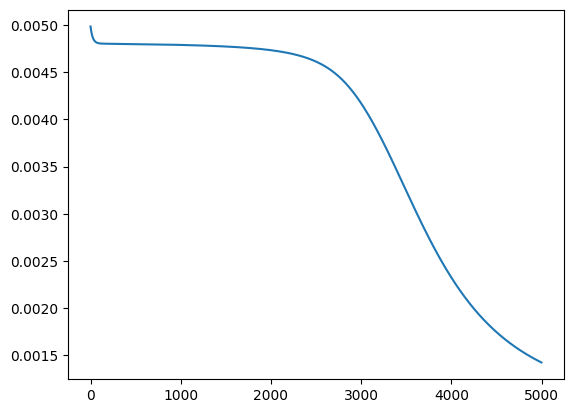

In [ ]:
w1,b1,w2,b2,w3,b3 = train(x_train, y_train, 0.1, 5000)                     # for alpha = 0.1 and 5000 iterations

In [ ]:
print(w1,b1,w2,b2,w3,b3)                                 # final paramters after training

[[ 1.60185936 -1.12940347]
 [ 0.52232603  0.53063477]
 [-0.64031582  1.20122448]
 [ 0.60052143  0.60356117]] [[-4.35044326]
 [-3.94639942]
 [-4.30873063]
 [-4.63433526]] [[-2.45896026  0.95568715 -2.35778739  2.26188071]
 [-1.88205242  0.78405367 -2.1455046   1.0934791 ]
 [ 2.10207105 -1.15565821  1.9775854  -1.84268484]
 [-0.22739435  0.39750833 -0.19555921 -0.39902184]] [[0.13923743]
 [0.60652324]
 [0.56274216]
 [0.3568279 ]] [[-4.80370539 -3.31708946  4.14584929 -0.26844844]] [[0.33377668]]


In [ ]:
def pre(x, w1,b1,w2,b2,w3,b3):
  z1,a1,z2,a2,z3,a3 = fp(w1,b1,w2,b2,w3,b3,x)                    #predictions
  a = np.round(a3)
  return a

x = np.array([(30,-20)])
b = x.T
print(pre(b, w1,b1,w2,b2,w3,b3))


p = pre(x_dev, w1,b1,w2,b2,w3,b3)
accuracy(p, y_dev)

[[0.]]


np.float64(0.24)

iteration : 0
accuracy : 0.32
iteration : 2
accuracy : 0.42
iteration : 4
accuracy : 0.42
iteration : 6
accuracy : 0.42
iteration : 8
accuracy : 0.42
iteration : 10
accuracy : 0.42
iteration : 12
accuracy : 0.42
iteration : 14
accuracy : 0.42
iteration : 16
accuracy : 0.42
iteration : 18
accuracy : 0.42
iteration : 20
accuracy : 0.42
iteration : 22
accuracy : 0.42
iteration : 24
accuracy : 0.42
iteration : 26
accuracy : 0.42
iteration : 28
accuracy : 0.42
iteration : 30
accuracy : 0.42
iteration : 32
accuracy : 0.42
iteration : 34
accuracy : 0.42
iteration : 36
accuracy : 0.42
iteration : 38
accuracy : 0.42
iteration : 40
accuracy : 0.42
iteration : 42
accuracy : 0.42
iteration : 44
accuracy : 0.42
iteration : 46
accuracy : 0.42
iteration : 48
accuracy : 0.42
iteration : 50
accuracy : 0.42
iteration : 52
accuracy : 0.42
iteration : 54
accuracy : 0.42
iteration : 56
accuracy : 0.42
iteration : 58
accuracy : 0.42
iteration : 60
accuracy : 0.42
iteration : 62
accuracy : 0.42
iteration : 6

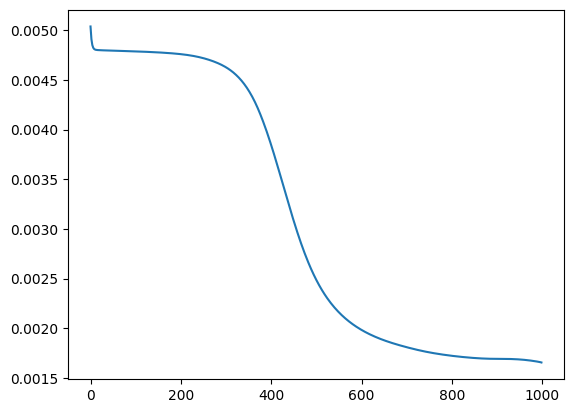

In [ ]:
w1,b1,w2,b2,w3,b3 = train(x_train, y_train, 1, 1000)                      # for alpha = 1 and 1000 iterations

In [ ]:
print(w1,b1,w2,b2,w3,b3)                       # parameters after training

[[ 1.34507836  0.56898778]
 [ 1.09833018 -0.96060855]
 [-0.41230178 -0.80975102]
 [ 0.55623091  0.32940874]] [[-4.93758017]
 [-5.0430003 ]
 [-4.62684887]
 [-4.87286443]] [[-1.30665937  1.82491429 -1.95921191 -1.45453993]
 [ 1.60536117 -2.1897465   2.33766817  1.50136703]
 [-2.49241286  3.30249916 -3.2519313  -1.96624549]
 [-1.61600749  1.97210068 -2.45699217 -1.59258812]] [[ 0.17850213]
 [-0.19570401]
 [ 0.12115184]
 [ 0.34821855]] [[ 2.76456118 -4.61506097  5.60535743  3.3825224 ]] [[-2.86379859]]


In [ ]:
x1 = np.array([(30,-20)])
b = x1.T                                                   # predictions
print(pre(b, w1,b1,w2,b2,w3,b3))


p = pre(x_dev, w1,b1,w2,b2,w3,b3)
accuracy(p, y_dev)

[[0.]]


np.float64(0.26)